In [2]:
import pandas as pd
import numpy as np

In [23]:
df=pd.read_csv('sps2.csv')

In [50]:
for i in sps.columns:
    m=round(sps[i].mean(),3)
    sps[i]=sps[i].fillna(m)

In [54]:
sps['RD']=round(sps['RD'],2)
print(sps['RD'])

0     93.70
1     95.20
2     98.20
3     99.30
4     99.80
      ...  
95    59.70
96    56.42
97    84.38
98    39.29
99    45.59
Name: RD, Length: 100, dtype: float64


In [21]:
df['Hardness']=round(df['Hardness'],3)

In [22]:
df.to_csv('sps2.csv', index=None,header=True)

In [24]:
df.columns

Index(['Temperature', 'RD', 'Grain_size', 'Hardness', 'FT'], dtype='object')

In [75]:
X=df.drop(['Hardness','FT'],axis=1).values
y=df.drop(['Temperature', 'RD', 'Grain_size'],axis=1).values

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [77]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

In [78]:
out=model.predict([[1403 ,99.6, 0.3],[1860 ,100 ,0.1]])
print(out)

[[17.98084284  5.91786828]
 [19.33081522  5.11396272]]


In [79]:
from sklearn.metrics import r2_score
y_pred=model.predict(X_test)
accuracy=r2_score(y_test, y_pred)
print(accuracy)

-0.45391188578501734


Text(0.5, 1.0, 'Hardness and FT')

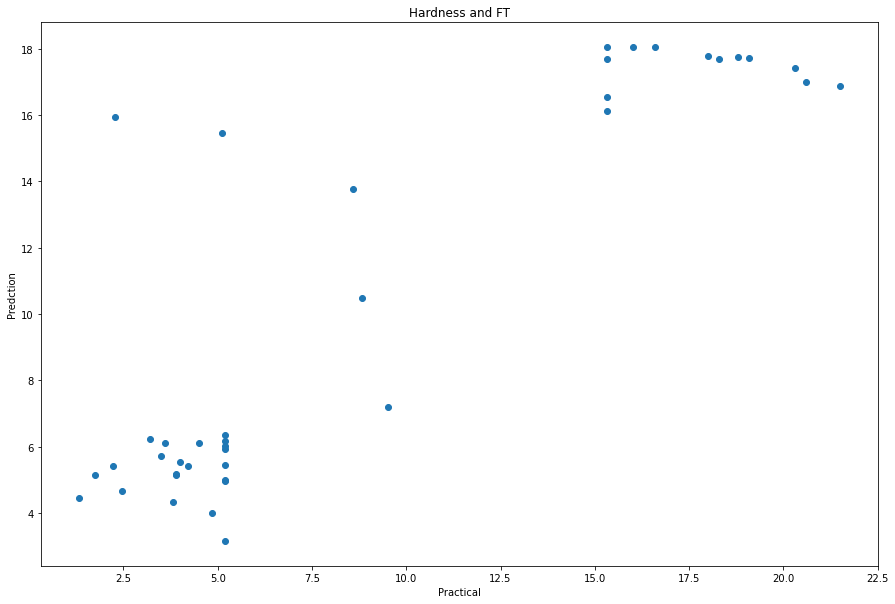

In [81]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test, y_pred)
plt.xlabel('Practical')
plt.ylabel('Predction')
plt.title('Hardness and FT')
